# 선형회귀 데모-송준섭

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

In [4]:
data_dir = Path('./input/')
trn_file = data_dir / 'train.csv'
seed = 42

In [5]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


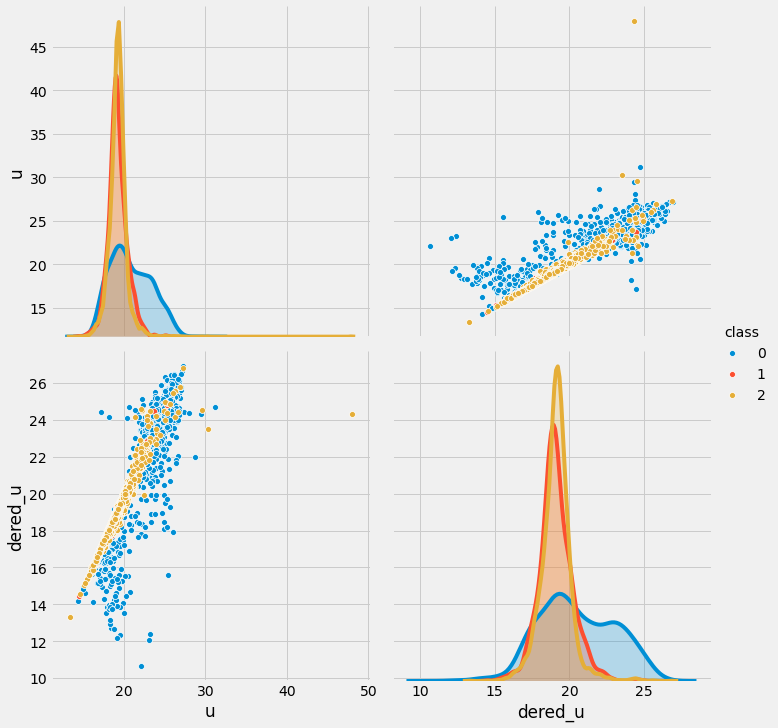

In [6]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)

In [7]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


## RMSE 손실함수 정의

In [8]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

## NumPy를 이용한 선형회귀

In [9]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

In [10]:
x = X.flatten()
print(x.shape)

(200004,)


In [11]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [12]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [13]:
rmses

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

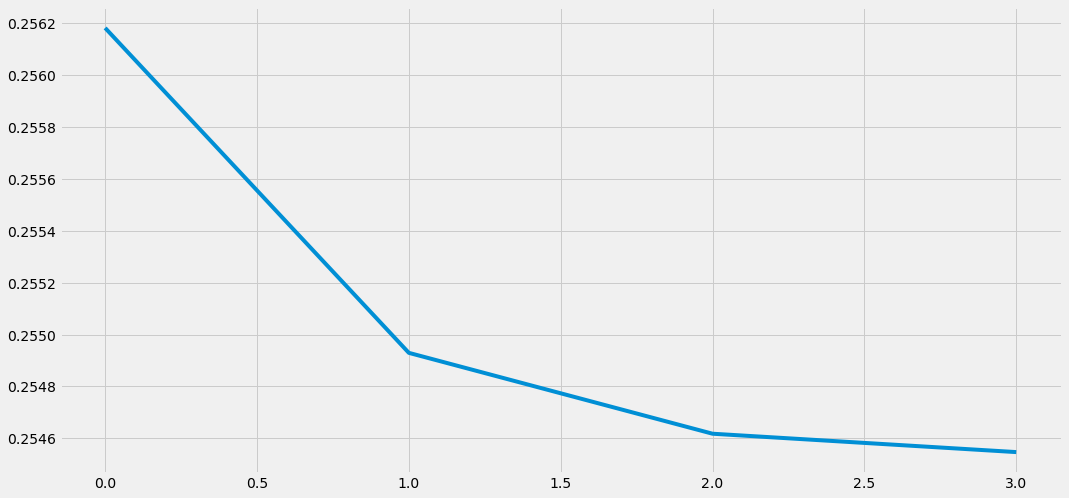

In [14]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

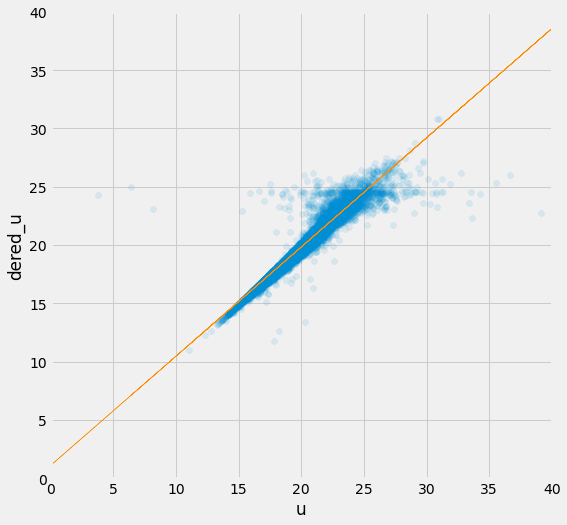

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

## scikit-learn을 이용한 선형회귀

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [17]:
rmse(y, p)

0.2522450693360897

In [18]:
lr.coef_, lr.intercept_

(array([0.9320425]), 1.155642417862527)

Text(0, 0.5, 'dered_u')

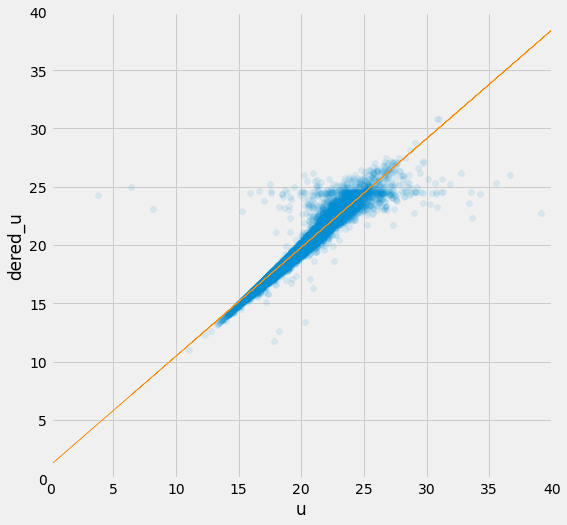

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

## scikit-learn을 이용한 로지스틱회귀

In [20]:
X = trn[trn['class'] != 0].drop('class', axis=1)#독립변수
y = trn[trn['class'] != 0]['class'].values - 1#종속변수

In [21]:
np.unique(y)

array([0, 1], dtype=int64)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [23]:
lr.coef_, lr.intercept_

(array([[ 0.80388918,  0.06663392, -1.87467936,  0.51997016, -0.55160911,
         -1.60695637,  2.27096274, -0.05999381, -1.35703588,  0.59304658,
         -0.59377329,  0.09226125, -0.10869196, -0.14512561, -0.1477884 ,
         -0.14260961, -0.14385046, -0.14643947]]),
 array([0.22267834]))

In [24]:
log_loss(y, p)

0.3656572335682927

In [25]:
roc_auc_score(y, p)

0.876302272983617

In [26]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

ModuleNotFoundError: No module named 'kaggler'

NameError: name 'plot_roc_curve' is not defined

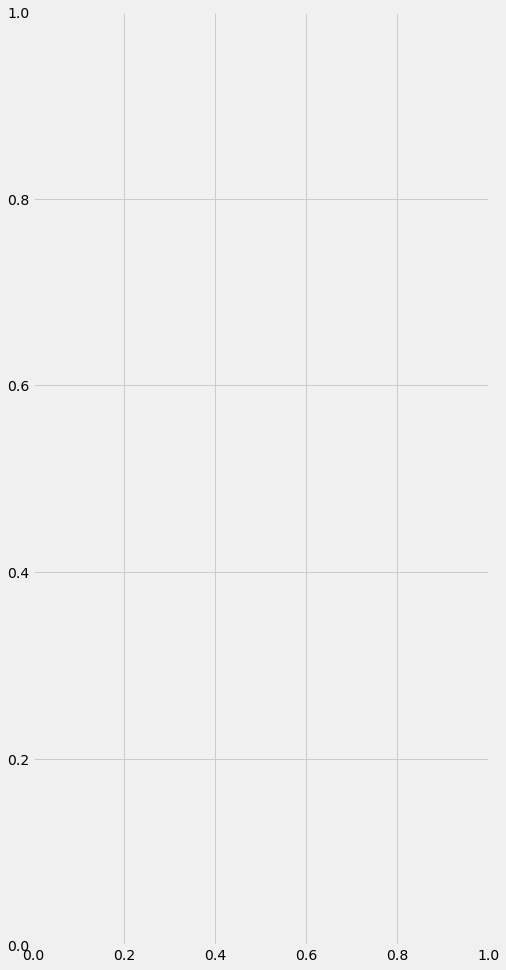

In [30]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('ROC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')

In [29]:
kaggler --version

NameError: name 'kaggler' is not defined